# Project Gutenberg Book Scraper

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud as wc

#Load Bing sentiment lexicon
sentiments = pd.read_csv('sentiments.csv', names = ['word', 'sentiment'])
sentiments = sentiments[1:]

#Load list of stopwords
stop_words =["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

#Html links to selected books
html_frankenstein = 'https://www.gutenberg.org/files/84/84-h/84-h.htm'
html_dorian = 'https://www.gutenberg.org/files/174/174-h/174-h.htm'

In [2]:
def remove_punctuation(text):
    for ch in ['\'', '“', '”', '\r', '\xa0', '.', ',', ':', ';', '(', ')']:
        text = text.replace(ch, '')
    for ch in ['!', '?', '\n', '—']:
        text = text.replace(ch, ' ')
    return text.split()


def scraper(html, chapter_syntax = 2):
    #Download the webpage
    page = requests.get(html)
    #create instance of beautifulsoup class
    soup = BeautifulSoup(page.content, 'html.parser')
    #Find the number of chapters in the book
    n_chapters = len(soup.find_all('div', class_ = "chapter"))
    #Scrape each chapter into list of lists
    content = [soup.find_all('div', class_ = "chapter")[i].get_text() for i in range(n_chapters)]
    #Remove punctuation from each chapter
    clean_content = [remove_punctuation(x) for x in content]
    #Insert unofficial chapter titles for plotting purposes later on
    for i in range(len(clean_content)):
        clean_content[i].insert(0, str(i+1) + str(':'))
    
    #Creates list of each chapter
    chapter_titles = [' '.join(x[:chapter_syntax]) for x in clean_content]
    #Removes chapter number from each chapter
    content = [x[chapter_syntax:] for x in clean_content]
    #converts all strings to lowercase
    content = [[x.lower() for x in content[i]] for i in range(len(content))]
    #Removes stopwords
    content = [[w for w in content[i] if w not in stop_words] for i in range(len(content))]
    #Making dataframe where each observation is a word and the chapter it is in
    for i in range(len(content)):
        if i == 0:
            base = pd.DataFrame(content[0], columns = ['word'])
            base['chapter'] = chapter_titles[0]
        else:
            next_chapter = pd.DataFrame(content[i], columns = ['word'])
            next_chapter['chapter'] = chapter_titles[i]
            base = pd.concat([base, next_chapter])
    #Merge dataframe of words and their sentiment
    df = base.merge(sentiments, how = 'left')
    #Create an unoffical chapter column so we can plot by chapters in numerical order
    df['unofficial_chapter'] = df['chapter'].str.split(':').str[0].astype(int)
    return df


def basic_analysis(df, num_words = 15):
    print('{} most frequent words: '.format(num_words))
    print(df['word'].value_counts().head(num_words).to_string())

    print("\n{} most frequent positive words:".format(num_words))
    print(df[df['sentiment'] == 'positive']['word'].value_counts().head(num_words).to_string())

    print('\n{} most frequent negative words:'.format(num_words))
    print(df[df['sentiment'] == 'negative']['word'].value_counts().head(num_words).to_string())
    

    print("\nNumber of positive and negative words:")
    print(df[df['sentiment'].notnull()].groupby(['sentiment'])['word'].count().to_string())
    
    print('\n')
    df.groupby('unofficial_chapter')['sentiment'].value_counts(normalize=True).sort_index().unstack().plot(kind = 'bar',figsize=(12,8))
    plt.title('Positive/Negative Sentiment by Chapter')
    plt.show()
    
def wordcloud(df):
    negatives = ' '.join(df[df['sentiment'] == 'negative']['word'].tolist())
    positives = ' '.join(df[df['sentiment'] == 'positive']['word'].tolist())
    words = negatives + positives
    wordcloud = wc.WordCloud(background_color='white').generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Frankenstein; or the Modern Prometheus 
### by Mary Shelly

10 most frequent words: 
man          131
life         115
father       113
eyes         104
time          98
elizabeth     88
night         87
mind          85
day           80
felt          79

10 most frequent positive words:
love         59
great        49
happiness    49
happy        46
joy          41
affection    40
pleasure     37
good         36
gentle       34
work         33

10 most frequent negative words:
death        77
miserable    65
misery       54
despair      48
poor         45
fear         40
lost         33
strange      32
fiend        31
cold         31

Number of positive and negative words:
sentiment
negative    3713
positive    2762




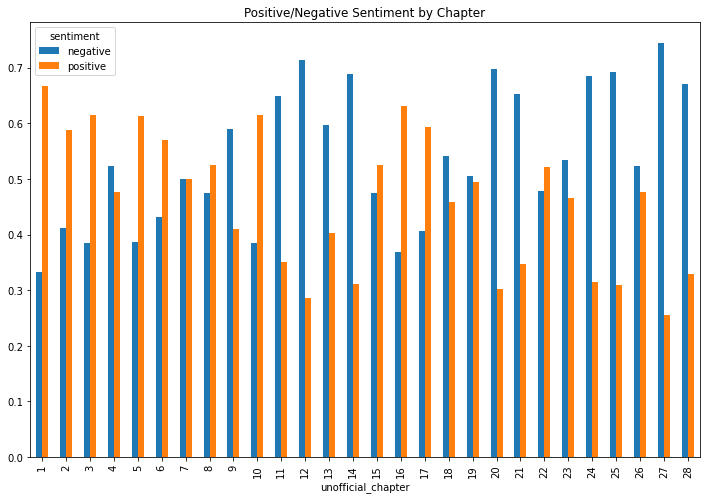

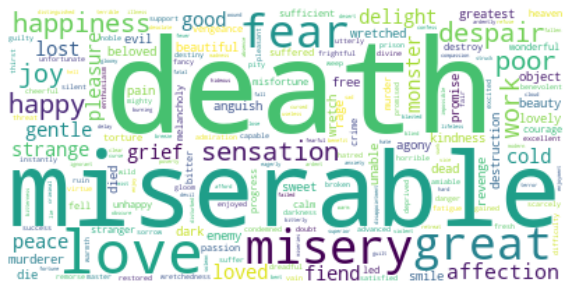

In [3]:
df = scraper(html_frankenstein, 3)
basic_analysis(df,  num_words=10)
wordcloud(df)

## The Picture of Dorian Gray
### By Oscar Wilde

10 most frequent words: 
dorian    409
don’t     255
lord      247
life      227
henry     223
gray      188
harry     174
man       171
basil     153
things    127

10 most frequent positive words:
love         109
good         107
great         75
wonderful     58
beauty        55
passion       46
pleasure      45
work          44
beautiful     44
charming      41

10 most frequent negative words:
afraid      61
horrible    48
strange     46
dreadful    43
dead        40
terrible    40
bad         36
mad         35
hideous     32
death       32

Number of positive and negative words:
sentiment
negative    3067
positive    2172




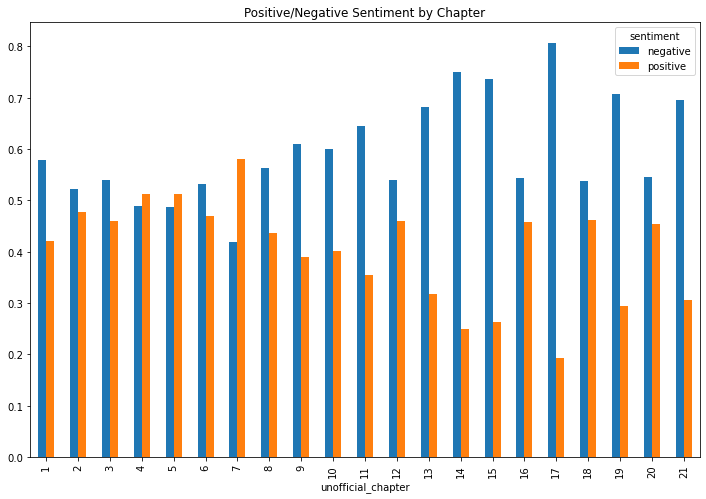

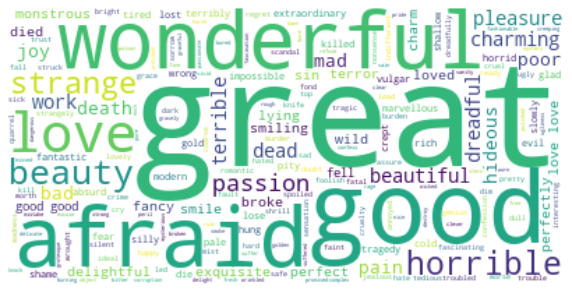

In [4]:
df = scraper(html_dorian, 3)
basic_analysis(df,  num_words=10)
wordcloud(df)